<a href="https://colab.research.google.com/github/OctaviaCosby/CountyCrashDataAnalysis/blob/main/2020_Tri_County_Crash_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data frame and libraries



In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import norm
import math
from scipy.stats import f_oneway
import numpy as np

In [ ]:
# URL to the CSV file
url = 'https://raw.githubusercontent.com/cam-alvarez/Personal-Portfolio-and-Blog/main/public/2020-tristatecounty-crashdata.csv'

# Read the CSV file from the URL and Fixing warning by reloading our dataset with low_memory parameter set to false
df1 = pd.read_csv(url, low_memory=False)

In [ ]:
# Checking upload by displaying the first few rows of the dataframe
print(df1.head())

   OBJECTID            XID  CALENDAR_YEAR  CRASH_NUMBER     CASE_NUMBER  \
0     46260  2020240008560           2020     240008560  SW200418002763   
1     46262  2020240009300           2020     240009300  SW200623004004   
2     46263  2020240008950           2020     240008950  SW200526003407   
3     46264  2020240009370           2020     240009370  SW200627004094   
4     46265  2020240009390           2020     240009390  SW200630004129   

   INVSTGT_AGCY_CD          AGENCY_TYPE_TXT  DOT_GEOG_DIST_CD  DOT_CNTY_CD  \
0                2  COUNTY SHERIFF'S OFFICE                 6           87   
1                2  COUNTY SHERIFF'S OFFICE                 6           87   
2                2  COUNTY SHERIFF'S OFFICE                 6           87   
3                2  COUNTY SHERIFF'S OFFICE                 6           87   
4                2  COUNTY SHERIFF'S OFFICE                 6           87   

   COUNTY_TXT  ... DST_TOXTRMNODB_NUM   LATITUDE  LONGITUDE   X_COORDINATE  \
0 

# Grouping

### Counties

In [ ]:
# Grouping by County (All accidents)
Miami_dade_county = df1[(df1['COUNTY_TXT'] == "MIAMI-DADE")].groupby('COUNTY_TXT').size()
print(Miami_dade_county)

Broward_county = df1[(df1['COUNTY_TXT'] == "BROWARD")].groupby('COUNTY_TXT').size()
print(Broward_county)

# Palm Beach is excluded
# Palm_beach_county = df1[(df1['COUNTY_TXT'] == "PALM BEACH")].groupby('COUNTY_TXT').size()
# print(Palm_beach_county)

COUNTY_TXT
MIAMI-DADE    27817
dtype: int64
COUNTY_TXT
BROWARD    10234
dtype: int64


### I-75 and I-95 Accidents

In [ ]:
# # Grouping all accidents from different counties on highway I75 and checking to see if grouping is correct
I75_accidents_count = df1[(df1['US_ROAD_NUMBER'] == "I 75")].groupby('US_ROAD_NUMBER').size()
print('The amount of accidents on I-75:', I75_accidents_count)
I75_accidents = df1[(df1['US_ROAD_NUMBER'] == "I 75")]
I75_accidents.head()

The amount of accidents on I-75: US_ROAD_NUMBER
I 75    435
dtype: int64


,OBJECTID,XID,CALENDAR_YEAR,CRASH_NUMBER,CASE_NUMBER,INVSTGT_AGCY_CD,AGENCY_TYPE_TXT,DOT_GEOG_DIST_CD,DOT_CNTY_CD,COUNTY_TXT,...,DST_TOXTRMNODB_NUM,LATITUDE,LONGITUDE,X_COORDINATE,Y_COORDINATE,ARBM_ROADSIDE,GEO_URBAN_RURAL_IND,MAP_SOURCE,EXTRACT_DATE,ARBM_ROAD_STATUS
304,1676137,2020882494120,2020,882494120,FHPE20OFF006574,1,FLORIDA HIGHWAY PATROL,6,87,MIAMI-DADE,...,0.0,25.942832,-80.351416,564941.015149,2.869514e+06,L,NaN,ARBM15Q1R2,1686446352000,NaN
327,1677167,2020882305890,2020,882305890,FHPK20OFF004406,1,FLORIDA HIGHWAY PATROL,6,87,MIAMI-DADE,...,0.0,25.952052,-80.350435,565034.164243,2.870535e+06,O,NaN,ARBM15Q1R2,1686446352000,NaN
338,1677687,2020882491930,2020,882491930,FHPE20OFF003019,1,FLORIDA HIGHWAY PATROL,6,87,MIAMI-DADE,...,0.0,25.924257,-80.350583,565034.653392,2.867457e+06,L,NaN,ARBM15Q1R2,1686446352000,NaN
380,1679419,2020882496780,2020,882496780,FHPE20OFF001008,1,FLORIDA HIGHWAY PATROL,6,87,MIAMI-DADE,...,0.0,25.904962,-80.349712,565132.468170,2.865321e+06,L,NaN,ARBM15Q1R2,1686446352000,NaN
476,1805781,2020882328330,2020,882328330,FHPE20OFF004966,1,FLORIDA HIGHWAY PATROL,6,87,MIAMI-DADE,...,0.0,25.897955,-80.344654,565642.919994,2.864547e+06,O,NaN,ARBM15Q1R2,1686446352000,NaN


In [ ]:
# Grouping all accidents from Broward and Miami-Dade on highway I95 and checking to see if grouping is correct
I95_accidents_counts = df1[(df1['US_ROAD_NUMBER'] == "I 95") & (df1['COUNTY_TXT'] != "PALM BEACH")].groupby('US_ROAD_NUMBER').size()
print('The amount of accidents on I-95:', I95_accidents_counts)

I95_accidents = df1[(df1['US_ROAD_NUMBER'] == "I 95") & (df1['COUNTY_TXT'] != "PALM BEACH")]
print(I95_accidents.head())

The amount of accidents on I-95: US_ROAD_NUMBER
I 95    3636
dtype: int64
    OBJECTID            XID  CALENDAR_YEAR  CRASH_NUMBER      CASE_NUMBER  \
24    188237  2020880543190           2020     880543190  FHPE20OFF019318   
26    188239  2020880543270           2020     880543270  FHPE20OFF039121   
81   1664162  2020882532700           2020     882532700  FHPE20OFF009971   
82   1664163  2020882532710           2020     882532710  FHPE20OFF009971   
97   1664728  2020882532740           2020     882532740  FHPE20OFF010015   

    INVSTGT_AGCY_CD         AGENCY_TYPE_TXT  DOT_GEOG_DIST_CD  DOT_CNTY_CD  \
24                1  FLORIDA HIGHWAY PATROL                 6           87   
26                1  FLORIDA HIGHWAY PATROL                 6           87   
81                1  FLORIDA HIGHWAY PATROL                 6           87   
82                1  FLORIDA HIGHWAY PATROL                 6           87   
97                1  FLORIDA HIGHWAY PATROL                 6           8

### Grouping accidents on I-75 and I-95 by *county*

In [ ]:
I75_accidents_by_county = I75_accidents.groupby('COUNTY_TXT').size()
I95_accidents_by_county = I95_accidents.groupby('COUNTY_TXT').size()

# Print the number of accidents on I-75 and I-95 by each county
print("Accidents on I-75 by County:")
print(I75_accidents_by_county)
print("\nAccidents on I-95 by County:")
print(I95_accidents_by_county)

Accidents on I-75 by County:
COUNTY_TXT
BROWARD       267
MIAMI-DADE    168
dtype: int64

Accidents on I-95 by County:
COUNTY_TXT
BROWARD       1122
MIAMI-DADE    2514
dtype: int64


### Grouping I-75 intersecting roadway and I-95 intersecting roadway

In [ ]:
# Filter accidents that occurred on I-75
I75_accident_locations = df1[df1['US_ROAD_NUMBER'] == 'I 75']['INT_ROADWAY_NAME'].unique()
I75_accident_locations

array(['SR 860', 'I 75', '138TH ST NW', 'SR 826', '154TH ST NW', 'SR 924',
       '24TH AVE W', '20TH AVE W', '23RD AVE W', 'HIALEAH GARDENS BLVD',
       '84TH ST W', '170TH ST NW', 'I 75 EL NB/SB', '76TH ST W',
       '80TH ST W', '186TH ST NW', '73RD ST W', '30TH CT W',
       'HOSPITAL PARKING ENT', '122ND ST NW', 'SR 93', 'SR 821',
       '87TH AVE NW', '68TH ST W', '28TH AVE W', 'SR 820',
       'ROYAL PALM BLVD', 'SHERIDAN ST', 'CR 833', 'PINES BLVD',
       'MIRAMAR PKWY', 'GRIFFIN RD', 'US 27', 'SR 869', 'CR 858',
       'GLADES PKWY', 'WESTON RD', 'SR 862', 'INDIAN TRACE',
       '184TH AVE NW', '184TH AVE SW', 'SR 84', 'INDIAN TRACE RD',
       'BONAVENTURE BLVD', 'CR 822', 'INDIAN TRC', 'SNAKE RD',
       'INDINA TRACE', 'I 595', 'SR 84 EB', 'SR 818', 'MM 41',
       'MIRAMARY PKWY', 'HOLLYWOOD BLVD', 'GRIFFING RD',
       'MM 37 REST AREA', 'I 595 EB', 'STIRLING RD', 'GRIFFIN BLVD',
       'BASS CREEK RD', 'SR 822 ENT', 'INDIAN TRACE BLVD', 'PEMBROKE RD',
       '86075042'

In [ ]:
# All of I-95 accident locations
I95_accident_locations = df1[df1['US_ROAD_NUMBER'] == 'I 95']['INT_ROADWAY_NAME'].unique()
I95_accident_locations

array(['151ST ST NW', '79TH ST NW', '135TH ST NW', 'RICKENBACKER CSWY',
       '125TH ST NW', 'I 95', '81ST ST NW', 'RICKERBACKER CSWY', 'SR 924',
       'SR 826', 'SR 922', 'SR 836', '95TH ST NW', '62ND ST NW',
       'IVES DAIRY RD', '4TH ST SW', '103RD ST NW', 'SR 112',
       '167TH ST NW', 'US 1', 'US 441', 'I 195', '119TH ST NW', 'SR 860',
       'SR 91', '125TH ST', 'US 41', 'SR 932', '71ST ST NW',
       'MIAMI GARDENS DR', 'SR 826 RAMP', 'I 395', 'CR 854', 'SR 5',
       '2ND AVE NW', '2ND ST NW ENT', 'SR 90', 'SR 7', '203RD ST NE',
       '8TH ST SW', '54TH ST NW', 'SR 91 ENT', '10TH ST NW',
       'MIAMI AVE S', '2ND ST NW', '203RD ST NW', '7TH ST SW',
       '103RD AVE NW', '125TH AVE NW', '151TH ST NW', '12TH AVE NW',
       '25TH RD SW', '103TH ST NW', '69TH ST NW', '8TH ST NW', 'SR 913',
       'SR 968', '62ND AVE NW', '79TH ST NE', '62ND ST SW', 'SR 916',
       'SR 934', '79TH AVE NW', 'MIAMI AVE', 'SR 91 NB', 'IVES DIARY RD',
       'IVES DAIRY RAOD', '26TH RD SW', 'S

In [ ]:
I95_accidents = df1[(df1['US_ROAD_NUMBER'] == "I 95") & (df1['COUNTY_TXT'] != "PALM BEACH")]
I95_accident_locations = I95_accidents['INT_ROADWAY_NAME'].unique()

print("Accident Locations on I-95 (Excluding Palm Beach County):")
for location in I95_accident_locations:
    print(location)


Accident Locations on I-95 (Excluding Palm Beach County):
151ST ST NW
79TH ST NW
135TH ST NW
RICKENBACKER CSWY
125TH ST NW
I 95
81ST ST NW
RICKERBACKER CSWY
SR 924
SR 826
SR 922
SR 836
95TH ST NW
62ND ST NW
IVES DAIRY RD
4TH ST SW
103RD ST NW
SR 112
167TH ST NW
US 1
US 441
I 195
119TH ST NW
SR 860
SR 91
125TH ST
US 41
SR 932
71ST ST NW
MIAMI GARDENS DR
SR 826 RAMP
I 395
CR 854
SR 5
2ND AVE NW
2ND ST NW ENT
SR 90
SR 7
203RD ST NE
8TH ST SW
54TH ST NW
SR 91 ENT
10TH ST NW
MIAMI AVE S
2ND ST NW
203RD ST NW
7TH ST SW
103RD AVE NW
125TH AVE NW
151TH ST NW
12TH AVE NW
25TH RD SW
103TH ST NW
69TH ST NW
8TH ST NW
SR 913
SR 968
62ND AVE NW
79TH ST NE
62ND ST SW
SR 916
SR 934
79TH AVE NW
MIAMI AVE
SR 91 NB
IVES DIARY RD
IVES DAIRY RAOD
26TH RD SW
SR 970
167TH ST NE
6TH AVE NW
135TH ST
135TH ST SW
SR 91 EXIT
14TH ST NW
IVES DARY RD
270505
6TH ST SW
2ND AVE SW
OPA LOCKA BLVD
135TH NW
29TH ST NW
26TH RD NW
11TH ST NW
3RD ST SW
5TH ST SW
SR 870
SR 834
SR 848
SR 838
SR 820
HOLLYWOOD BLVD
SR 816
SR 81

### Grouping I-75 and I-95 intersecting roadways by count

In [ ]:
I75_accident_locations = df1[df1['US_ROAD_NUMBER'] == 'I 75']['INT_ROADWAY_NAME'].value_counts()
print(I75_accident_locations)

INT_ROADWAY_NAME
SR 860               50
138TH ST NW          46
ROYAL PALM BLVD      39
CR 833               29
GRIFFIN RD           26
                     ..
28TH AVE W            1
184TH AVE NW          1
184TH AVE SW          1
INDIAN TRC            1
MILE MARKER #29 L     1
Name: count, Length: 72, dtype: int64


In [ ]:
# All of I-95 in Broward, Palm, and Miami-Dade
I95_accident_locations = df1[df1['US_ROAD_NUMBER'] == 'I 95']['INT_ROADWAY_NAME'].value_counts()
print(I95_accident_locations)

INT_ROADWAY_NAME
62ND ST NW       219
IVES DAIRY RD    195
SR 860           187
79TH ST NW       175
103RD ST NW      165
                ... 
6TH AVE NW         1
135TH ST           1
135TH ST SW        1
SR 91 EXIT         1
23RD AVE SW        1
Name: count, Length: 228, dtype: int64


In [ ]:
#  I-95 intersecting roadways by count in only Broward and Miami-dade
I95_accidents = df1[(df1['US_ROAD_NUMBER'] == "I 95") & (df1['COUNTY_TXT'] != "PALM BEACH")]
I95_accident_locations = I95_accidents['INT_ROADWAY_NAME'].value_counts()
print(I95_accident_locations)

INT_ROADWAY_NAME
62ND ST NW        219
IVES DAIRY RD     195
SR 860            187
79TH ST NW        175
103RD ST NW       165
                 ... 
135TH NW            1
29TH ST NW          1
26TH RD NW          1
11TH ST NW          1
SUNRISE BLVD W      1
Name: count, Length: 142, dtype: int64


### Injury Severity and count for I-75 and I-95 accidents locations

In [ ]:
I75_injsever_count = df1[df1['US_ROAD_NUMBER'] == 'I 75'].groupby(['INT_ROADWAY_NAME', 'INJSEVER']).size().reset_index(name='COUNT')

print("Number of accidents at each location on I-75")
for index, row in I75_injsever_count.iterrows():
    location = row['INT_ROADWAY_NAME']
    severity = row['INJSEVER']
    count = row['COUNT']
    print(f"Location {location}, Injury Severity: {severity}, Accident Count: {count}")

Number of accidents at each location on I-75
Location 122ND ST NW, Injury Severity: 1, Accident Count: 1
Location 138TH ST NW, Injury Severity: 1, Accident Count: 37
Location 138TH ST NW, Injury Severity: 2, Accident Count: 2
Location 138TH ST NW, Injury Severity: 3, Accident Count: 5
Location 138TH ST NW, Injury Severity: 4, Accident Count: 2
Location 154TH ST NW, Injury Severity: 1, Accident Count: 1
Location 170TH ST NW, Injury Severity: 1, Accident Count: 1
Location 184TH AVE NW, Injury Severity: 3, Accident Count: 1
Location 184TH AVE SW, Injury Severity: 3, Accident Count: 1
Location 186TH ST NW, Injury Severity: 1, Accident Count: 1
Location 20TH AVE W, Injury Severity: 1, Accident Count: 3
Location 23RD AVE W, Injury Severity: 1, Accident Count: 1
Location 23RD AVE W, Injury Severity: 3, Accident Count: 1
Location 24TH AVE W, Injury Severity: 1, Accident Count: 3
Location 28TH AVE W, Injury Severity: 1, Accident Count: 1
Location 30TH CT W, Injury Severity: 1, Accident Count: 1

In [ ]:
I95_injsever_count = df1[(df1['US_ROAD_NUMBER'] == 'I 95') & (df1['COUNTY_TXT'] != 'PALM BEACH')].groupby(['INT_ROADWAY_NAME', 'INJSEVER']).size().reset_index(name='COUNT')

print("Number of accidents at each location on I-95")
for index, row in I95_injsever_count.iterrows():
    location = row['INT_ROADWAY_NAME']
    severity = row['INJSEVER']
    count = row['COUNT']
    print(f"Location: {location}, Injury Severity: {severity}, Accident Count: {count}")


Number of accidents at each location on I-95
Location: 103RD AVE NW, Injury Severity: 1, Accident Count: 1
Location: 103RD ST NW, Injury Severity: 1, Accident Count: 121
Location: 103RD ST NW, Injury Severity: 2, Accident Count: 25
Location: 103RD ST NW, Injury Severity: 3, Accident Count: 15
Location: 103RD ST NW, Injury Severity: 4, Accident Count: 4
Location: 103TH ST NW, Injury Severity: 1, Accident Count: 1
Location: 10TH ST, Injury Severity: 1, Accident Count: 1
Location: 10TH ST NW, Injury Severity: 1, Accident Count: 1
Location: 10TH ST SW, Injury Severity: 1, Accident Count: 14
Location: 10TH ST SW, Injury Severity: 2, Accident Count: 3
Location: 10TH ST SW, Injury Severity: 3, Accident Count: 3
Location: 10TH ST SW, Injury Severity: 4, Accident Count: 7
Location: 10TH ST SW, Injury Severity: 5, Accident Count: 1
Location: 10TH SW, Injury Severity: 2, Accident Count: 1
Location: 119TH ST NW, Injury Severity: 0, Accident Count: 1
Location: 119TH ST NW, Injury Severity: 1, Accid

### Injury Severity and count for I-75 and I-95 accidents

In [ ]:
I75_injsever_count = df1[df1['US_ROAD_NUMBER'] == 'I 75'].groupby(['INJSEVER']).size().reset_index(name='COUNT')

print("Number of accidents at each location on I-75")
for index, row in I75_injsever_count.iterrows():
    severity = row['INJSEVER']
    count = row['COUNT']
    print(f"Injury Severity: {severity}, Accident Count: {count}")


Number of accidents at each location on I-75
Injury Severity: 0, Accident Count: 5
Injury Severity: 1, Accident Count: 280
Injury Severity: 2, Accident Count: 55
Injury Severity: 3, Accident Count: 59
Injury Severity: 4, Accident Count: 22
Injury Severity: 5, Accident Count: 13
Injury Severity: 6, Accident Count: 1


In [ ]:
I95_injsever_count = df1[(df1['US_ROAD_NUMBER'] == 'I 95') & (df1['COUNTY_TXT'] != 'PALM BEACH')].groupby(['INJSEVER']).size().reset_index(name='COUNT')

print("Number of accidents at each location on I-95")
for index, row in I95_injsever_count.iterrows():
    severity = row['INJSEVER']
    count = row['COUNT']
    print(f"Injury Severity: {severity}, Accident Count: {count}")


Number of accidents at each location on I-95
Injury Severity: 0, Accident Count: 43
Injury Severity: 1, Accident Count: 2524
Injury Severity: 2, Accident Count: 537
Injury Severity: 3, Accident Count: 314
Injury Severity: 4, Accident Count: 176
Injury Severity: 5, Accident Count: 38
Injury Severity: 6, Accident Count: 4


### Injury Severity and weather Conditions

In [ ]:
# Filter the dataframe for accidents on I-75
I75_accidents = df1[df1['US_ROAD_NUMBER'] == 'I 75']

# Group by weather condition and accident severity, then count the number of accidents
weather_severity_counts_I75 = I75_accidents.groupby(['EVNT_WTHR_COND_CD', 'INJSEVER']).size().reset_index(name='COUNT')

# Display the results
print("Weather conditions and accident severity on I-75:")
print(weather_severity_counts_I75)

Weather conditions and accident severity on I-75:
    EVNT_WTHR_COND_CD  INJSEVER  COUNT
0                   1         0      5
1                   1         1    171
2                   1         2     38
3                   1         3     41
4                   1         4     17
5                   1         5     10
6                   1         6      1
7                   2         1     55
8                   2         2     10
9                   2         3     11
10                  2         4      3
11                  3         1     54
12                  3         2      7
13                  3         3      6
14                  3         4      2
15                  3         5      3
16                  4         3      1


In [ ]:
# Filter the dataframe for accidents on I-95 excluding Palm Beach County
I95_accidents_excluding_Palm = df1[(df1['US_ROAD_NUMBER'] == 'I 95') & (df1['COUNTY_TXT'] != 'PALM BEACH')]

# Group by weather condition and accident severity, then count the number of accidents
weather_severity_counts_I95 = I95_accidents_excluding_Palm.groupby(['EVNT_WTHR_COND_CD', 'INJSEVER']).size().reset_index(name='COUNT')

# Display the results
print("Weather conditions and accident severity on I-95")
print(weather_severity_counts_I95)


Weather conditions and accident severity on I-95
    EVNT_WTHR_COND_CD  INJSEVER  COUNT
0                   1         0     27
1                   1         1   1752
2                   1         2    332
3                   1         3    216
4                   1         4    131
5                   1         5     24
6                   1         6      1
7                   2         0      8
8                   2         1    352
9                   2         2    120
10                  2         3     53
11                  2         4     17
12                  2         5      8
13                  3         0      8
14                  3         1    419
15                  3         2     85
16                  3         3     45
17                  3         4     28
18                  3         5      6
19                  3         6      3
20                 77         1      1


### Time of day of different injury severity and count for I-75 and I-95

In [ ]:
# Define time intervals
early_morning = range(0, 600)
morning = range(600, 1200)
afternoon = range(1200, 1800)
evening = range(1800, 2400)

# Filter the data based on time intervals
df1['TIME_GROUP'] = pd.cut(df1['CRASH_TIME'], bins=[-1, 600, 1200, 1800, 2400], labels=['Early Morning', 'Morning', 'Afternoon', 'Evening'])
I75_accidents = df1[df1['US_ROAD_NUMBER'] == 'I 75'].copy()

# Group by time of day and accident severity, then count the number of accidents
grouped_counts_I75 = I75_accidents.groupby(['TIME_GROUP', 'INJSEVER']).size().reset_index(name='COUNT')

# Display the results
print("Number of accidents on I-75 by time of day and accident severity:")
print(grouped_counts_I75)


Number of accidents on I-75 by time of day and accident severity:
       TIME_GROUP  INJSEVER  COUNT
0   Early Morning         0      2
1   Early Morning         1     24
2   Early Morning         2      9
3   Early Morning         3     12
4   Early Morning         4      2
5   Early Morning         5      2
6   Early Morning         6      0
7         Morning         0      0
8         Morning         1     78
9         Morning         2     22
10        Morning         3     17
11        Morning         4      7
12        Morning         5      1
13        Morning         6      0
14      Afternoon         0      1
15      Afternoon         1    113
16      Afternoon         2     13
17      Afternoon         3     15
18      Afternoon         4      7
19      Afternoon         5      5
20      Afternoon         6      1
21        Evening         0      2
22        Evening         1     65
23        Evening         2     11
24        Evening         3     15
25        Evening       

In [ ]:
# Define time intervals
early_morning = range(0, 600)
morning = range(600, 1200)
afternoon = range(1200, 1800)
evening = range(1800, 2400)

# Filter the data based on time intervals and exclude Palm Beach County
df1['TIME_GROUP'] = pd.cut(df1['CRASH_TIME'], bins=[-1, 600, 1200, 1800, 2400], labels=['Early Morning', 'Morning', 'Afternoon', 'Evening'])
I95_accidents = df1[(df1['US_ROAD_NUMBER'] == 'I 95') & (df1['COUNTY_TXT'] != 'PALM BEACH')].copy()

# Group by time of day and accident severity, then count the number of accidents
grouped_counts_I95 = I95_accidents.groupby(['TIME_GROUP', 'INJSEVER']).size().reset_index(name='COUNT')

# Display the results
print("Number of accidents on I-95 by time of day and accident severity (excluding Palm Beach County):")
print(grouped_counts_I95)


Number of accidents on I-95 by time of day and accident severity (excluding Palm Beach County):
       TIME_GROUP  INJSEVER  COUNT
0   Early Morning         0     24
1   Early Morning         1    339
2   Early Morning         2     92
3   Early Morning         3     52
4   Early Morning         4     44
5   Early Morning         5     14
6   Early Morning         6      2
7         Morning         0      2
8         Morning         1    663
9         Morning         2    181
10        Morning         3     76
11        Morning         4     26
12        Morning         5      4
13        Morning         6      0
14      Afternoon         0      6
15      Afternoon         1    881
16      Afternoon         2    142
17      Afternoon         3     98
18      Afternoon         4     49
19      Afternoon         5      7
20      Afternoon         6      1
21        Evening         0     11
22        Evening         1    641
23        Evening         2    122
24        Evening         3  

### Numer of Fatalities on Each Highway

In [ ]:
# Filter the dataframe for accidents on I-75
# Sum up the number of fatalities
total_fatalities_I75 = I75_accidents['NUMBER_OF_KILLED'].sum()

print("Total number of fatalities on I-75:", total_fatalities_I75)


# Group by location and sum up the number of killed
I75_killed_by_location = I75_accidents.groupby('INT_ROADWAY_NAME')['NUMBER_OF_KILLED'].sum().reset_index()

print("Number of killed at each location on I-75:")
print(I75_killed_by_location.to_string(index=False))


Total number of fatalities on I-75: 13
Number of killed at each location on I-75:
    INT_ROADWAY_NAME  NUMBER_OF_KILLED
         122ND ST NW                 0
         138TH ST NW                 0
         154TH ST NW                 0
         170TH ST NW                 0
        184TH AVE NW                 0
        184TH AVE SW                 0
         186TH ST NW                 0
          20TH AVE W                 0
          23RD AVE W                 0
          24TH AVE W                 0
          28TH AVE W                 0
           30TH CT W                 0
           68TH ST W                 0
           73RD ST W                 0
           76TH ST W                 0
           80TH ST W                 0
           84TH ST W                 0
            86075042                 0
         87TH AVE NW                 0
       BASS CREEK RD                 0
    BONAVENTURE BLVD                 0
              CR 822                 1
              CR 833 

In [ ]:
# Filter the dataframe for accidents on I-95
# Sum up the number of fatalities
total_fatalities_I95 = I95_accidents['NUMBER_OF_KILLED'].sum()

print("Total number of fatalities on I-95:", total_fatalities_I95)

# Group by location and sum up the number of killed
I95_killed_by_location = I95_accidents.groupby('INT_ROADWAY_NAME')['NUMBER_OF_KILLED'].sum().reset_index()

print("Number of killed at each location on I-95:")
print(I95_killed_by_location.to_string(index=False))

Total number of fatalities on I-95: 42
Number of killed at each location on I-95:
       INT_ROADWAY_NAME  NUMBER_OF_KILLED
           103RD AVE NW                 0
            103RD ST NW                 0
            103TH ST NW                 0
                10TH ST                 0
             10TH ST NW                 0
             10TH ST SW                 1
                10TH SW                 0
            119TH ST NW                 1
             11TH ST NW                 0
           125TH AVE NW                 0
               125TH ST                 0
            125TH ST NW                 0
            12TH AVE NW                 0
               135TH NW                 0
               135TH ST                 0
            135TH ST NW                 1
            135TH ST SW                 0
             14TH ST NW                 0
            151ST ST NW                 0
            151TH ST NW                 0
             15TH ST NW             

# Calculations

### 5 number summary

In [ ]:
I75_accidents.describe()

,OBJECTID,XID,CALENDAR_YEAR,CRASH_NUMBER,INVSTGT_AGCY_CD,DOT_GEOG_DIST_CD,DOT_CNTY_CD,CRASH_TIME,DAYOWEEK,DHSMV_CTY_CD,...,CRSH_XTMREF_NOD_ID,DSTNC_TOXTRNOD_NUM,CRSH_XTRREFNODB_ID,DST_TOXTRMNODB_NUM,LATITUDE,LONGITUDE,X_COORDINATE,Y_COORDINATE,EXTRACT_DATE,ARBM_ROAD_STATUS
count,4.350000e+02,4.350000e+02,435.0,4.350000e+02,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,...,435.0,435.0,435.0,435.0,435.000000,435.000000,435.000000,4.350000e+02,4.350000e+02,0.0
mean,2.683851e+06,2.020883e+12,2020.0,8.830436e+08,1.128736,4.772414,86.386207,1319.873563,3.926437,8680.188506,...,0.0,0.0,0.0,0.0,26.014025,-80.394040,560642.460064,2.877384e+06,1.686446e+12,NaN
std,4.243135e+05,7.151062e+06,0.0,7.151062e+06,0.380367,0.974879,0.487440,603.696765,2.003250,52.513473,...,0.0,0.0,0.0,0.0,0.095015,0.126054,12629.052281,1.049657e+04,0.000000e+00,NaN
min,1.270590e+05,2.020832e+12,2020.0,8.320494e+08,1.000000,4.000000,86.000000,0.000000,1.000000,8600.000000,...,0.0,0.0,0.0,0.0,25.884197,-80.872059,512785.202352,2.863034e+06,1.686446e+12,NaN
25%,2.564759e+06,2.020882e+12,2020.0,8.824954e+08,1.000000,4.000000,86.000000,845.000000,2.000000,8644.000000,...,0.0,0.0,0.0,0.0,25.922499,-80.362538,563750.264663,2.867262e+06,1.686446e+12,NaN
50%,2.827247e+06,2.020883e+12,2020.0,8.829456e+08,1.000000,4.000000,86.000000,1410.000000,4.000000,8679.000000,...,0.0,0.0,0.0,0.0,26.007601,-80.351334,564950.674648,2.876692e+06,1.686446e+12,NaN
75%,2.926824e+06,2.020884e+12,2020.0,8.836919e+08,1.000000,6.000000,87.000000,1753.500000,6.000000,8727.000000,...,0.0,0.0,0.0,0.0,26.101866,-80.348996,565195.651569,2.887122e+06,1.686446e+12,NaN
max,3.274971e+06,2.020898e+12,2020.0,8.979525e+08,3.000000,6.000000,87.000000,2355.000000,7.000000,8767.000000,...,0.0,0.0,0.0,0.0,26.172889,-80.321975,567913.817657,2.894837e+06,1.686446e+12,NaN


In [ ]:
I95_accidents_excluding_Palm.describe()

,OBJECTID,XID,CALENDAR_YEAR,CRASH_NUMBER,INVSTGT_AGCY_CD,DOT_GEOG_DIST_CD,DOT_CNTY_CD,CRASH_TIME,DAYOWEEK,DHSMV_CTY_CD,...,CRSH_XTMREF_NOD_ID,DSTNC_TOXTRNOD_NUM,CRSH_XTRREFNODB_ID,DST_TOXTRMNODB_NUM,LATITUDE,LONGITUDE,X_COORDINATE,Y_COORDINATE,EXTRACT_DATE,ARBM_ROAD_STATUS
count,3.636000e+03,3.636000e+03,3636.0,3.636000e+03,3636.000000,3636.000000,3636.000000,3636.000000,3636.000000,3636.000000,...,3636.0,3636.0,3636.0,3636.0,3636.000000,3636.000000,3636.000000,3.636000e+03,3.636000e+03,0.0
mean,2.633927e+06,2.020883e+12,2020.0,8.827717e+08,1.030803,5.382838,86.691419,1290.003575,4.154565,8703.932343,...,0.0,0.0,0.0,0.0,25.957180,-80.186370,581454.098552,2.871195e+06,1.686446e+12,NaN
std,3.793994e+05,1.542401e+07,0.0,1.542401e+07,0.216608,0.923942,0.461971,639.469472,1.980311,54.505251,...,0.0,0.0,0.0,0.0,0.145862,0.027148,2622.749467,1.617025e+04,0.000000e+00,NaN
min,1.383610e+05,2.020240e+12,2020.0,2.401071e+08,1.000000,4.000000,86.000000,0.000000,1.000000,8600.000000,...,0.0,0.0,0.0,0.0,25.749262,-80.214269,578679.651050,2.848158e+06,1.686446e+12,NaN
25%,2.410996e+06,2.020883e+12,2020.0,8.827540e+08,1.000000,4.000000,86.000000,802.750000,2.000000,8659.000000,...,0.0,0.0,0.0,0.0,25.848217,-80.208137,579341.426492,2.859114e+06,1.686446e+12,NaN
50%,2.733654e+06,2.020883e+12,2020.0,8.830230e+08,1.000000,6.000000,87.000000,1353.000000,4.000000,8700.000000,...,0.0,0.0,0.0,0.0,25.913998,-80.204916,579716.810504,2.866398e+06,1.686446e+12,NaN
75%,2.856885e+06,2.020883e+12,2020.0,8.834627e+08,1.000000,6.000000,87.000000,1812.250000,6.000000,8766.000000,...,0.0,0.0,0.0,0.0,26.018433,-80.166112,583466.461303,2.877991e+06,1.686446e+12,NaN
max,3.275661e+06,2.020901e+12,2020.0,9.012662e+08,4.000000,6.000000,87.000000,2358.000000,7.000000,8784.000000,...,0.0,0.0,0.0,0.0,26.325682,-80.114025,588428.366137,2.912053e+06,1.686446e+12,NaN


### Sum of accidents and sum of severity for I-75 and I-95

In [ ]:
# Calculate the total accident count on I-75
total_accidents_I75 = I75_injsever_count['COUNT'].sum()

# Print the total accident count on I-75
print("Total number of accidents on I-75:", total_accidents_I75)

Total number of accidents on I-75: 435


In [ ]:
# Calculate the total severity score (sum of severity * count) on I-75
total_severity_score_I75 = (I75_injsever_count['INJSEVER'] * I75_injsever_count['COUNT']).sum()

# Calculate the total number of accidents on I-75
total_accidents_I75 = I75_injsever_count['COUNT'].sum()

# Calculate the average severity of accidents on I-75
average_severity_I75 = total_severity_score_I75 / total_accidents_I75

# Print the average severity of accidents on I-75
print("Average severity of accidents on I-75:", average_severity_I75)

Average severity of accidents on I-75: 1.6689655172413793


In [ ]:
# Calculate the total accident count on I-95
total_accidents_I95 = I95_injsever_count['COUNT'].sum()

# Print the total accident count on I-95
print("Total number of accidents on I-95:", total_accidents_I95)

Total number of accidents on I-95: 3636


In [ ]:
# Calculate the total severity score sum of severity count on I-95
total_severity_score_I95 = (I95_injsever_count['INJSEVER'] * I95_injsever_count['COUNT']).sum()

# Calculate the total number of accidents on I-75
total_accidents_I95 = I95_injsever_count['COUNT'].sum()

# Calculate the average severity of accidents on I-75
average_severity_I95 = total_severity_score_I95 / total_accidents_I95

# Print the average severity of accidents on I-75
print("Average severity of accidents on I-95:", average_severity_I95)

Average severity of accidents on I-95: 1.501100110011001


### Relative frequency for accident severity on I-75 and I-95

In [ ]:
# Calculate the total number of accidents on I-75
total_accidents_I75 = df1[df1['US_ROAD_NUMBER'] == 'I 75']['INJSEVER'].count()

# Group data by injury severity on I-75
I75_severity_counts = df1[df1['US_ROAD_NUMBER'] == 'I 75'].groupby('INJSEVER').size().reset_index(name='COUNT')

# Calculate relative frequency for each severity level
I75_severity_counts['Relative_Frequency'] = I75_severity_counts['COUNT'] / total_accidents_I75

# Print the relative frequencies
print("Relative frequency of accidents on I-75:")
for index, row in I75_severity_counts.iterrows():
    severity = row['INJSEVER']
    relative_frequency = row['Relative_Frequency']
    print(f"Severity: {severity}, Relative Frequency: {relative_frequency:.4f}")

Relative frequency of accidents on I-75:
Severity: 0.0, Relative Frequency: 0.0115
Severity: 1.0, Relative Frequency: 0.6437
Severity: 2.0, Relative Frequency: 0.1264
Severity: 3.0, Relative Frequency: 0.1356
Severity: 4.0, Relative Frequency: 0.0506
Severity: 5.0, Relative Frequency: 0.0299
Severity: 6.0, Relative Frequency: 0.0023


In [ ]:
# Calculate the total number of accidents on I-95 excluding PALM BEACH COUNTY
total_accidents_I95 = df1[(df1['US_ROAD_NUMBER'] == 'I 95') & (df1['COUNTY_TXT'] != 'PALM BEACH')]['INJSEVER'].count()

# Group data by injury severity on I-95 excluding PALM BEACH COUNTY
I95_severity_counts = df1[(df1['US_ROAD_NUMBER'] == 'I 95') & (df1['COUNTY_TXT'] != 'PALM BEACH')].groupby('INJSEVER').size().reset_index(name='COUNT')

# Calculate relative frequency for each severity level
I95_severity_counts['Relative_Frequency'] = I95_severity_counts['COUNT'] / total_accidents_I95

# Print the relative frequencies
print("Relative frequency of accidents on I-95 excluding PALM BEACH COUNTY:")
for index, row in I95_severity_counts.iterrows():
    severity = row['INJSEVER']
    relative_frequency = row['Relative_Frequency']
    print(f"Severity: {severity}, Relative Frequency: {relative_frequency:.4f}")


Relative frequency of accidents on I-95 excluding PALM BEACH COUNTY:
Severity: 0.0, Relative Frequency: 0.0118
Severity: 1.0, Relative Frequency: 0.6942
Severity: 2.0, Relative Frequency: 0.1477
Severity: 3.0, Relative Frequency: 0.0864
Severity: 4.0, Relative Frequency: 0.0484
Severity: 5.0, Relative Frequency: 0.0105
Severity: 6.0, Relative Frequency: 0.0011


### Student T test and P-value for the time of day of different injury severity for I-75 and I-95

In [ ]:
from scipy.stats import ttest_ind

# Filter the dataset for accidents on I-95
I95_accidents = df1[(df1['US_ROAD_NUMBER'] == 'I 95') & (df1['COUNTY_TXT'] != 'PALM BEACH')]

# Divide the data into two groups based on the times of the day (e.g., morning and evening)
morning_accidents = I95_accidents[I95_accidents['TIME_GROUP'] == 'Morning']['INJSEVER']
evening_accidents = I95_accidents[I95_accidents['TIME_GROUP'] == 'Evening']['INJSEVER']

# Perform the Student's t-test
t_statistic, p_value = ttest_ind(morning_accidents, evening_accidents)

# Print the results
print("Student's t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in injury severity between morning and evening accidents.")
else:
    print("There is no statistically significant difference in injury severity between morning and evening accidents.")


Student's t-test results:
T-statistic: -2.531995352816852
P-value: 0.011422243925078488
There is a statistically significant difference in injury severity between morning and evening accidents.


### ANOVA test

In [ ]:
from scipy.stats import f_oneway


# Group the data by weather condition and injury severity, then count the number of accidents
weather_severity_counts_I75 = I75_accidents.groupby(['EVNT_WTHR_COND_CD', 'INJSEVER']).size().reset_index(name='COUNT')

# Pivot the data to prepare for ANOVA test
pivot_table = weather_severity_counts_I75.pivot_table(index='EVNT_WTHR_COND_CD', columns='INJSEVER', values='COUNT', fill_value=0)

# Perform ANOVA test
anova_result = f_oneway(pivot_table[1], pivot_table[2], pivot_table[3], pivot_table[4])

# Print ANOVA test result
print("ANOVA Test Result:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

ANOVA Test Result:
F-statistic: 2.3978142698579843
p-value: 0.1189426024524016


In [ ]:
from scipy.stats import f_oneway

# Filter the dataframe for accidents on I-95 excluding Palm Beach County
I95_accidents_excluding_Palm = df1[(df1['US_ROAD_NUMBER'] == 'I 95') & (df1['COUNTY_TXT'] != 'PALM BEACH')]

# Group the data by weather condition and injury severity, then count the number of accidents
weather_severity_counts_I95 = I95_accidents_excluding_Palm.groupby(['EVNT_WTHR_COND_CD', 'INJSEVER']).size().reset_index(name='COUNT')

# Pivot the data to prepare for ANOVA test
pivot_table = weather_severity_counts_I95.pivot_table(index='EVNT_WTHR_COND_CD', columns='INJSEVER', values='COUNT', fill_value=0)

# Perform ANOVA test
anova_result = f_oneway(pivot_table[1], pivot_table[2], pivot_table[3], pivot_table[4])

# Print ANOVA test result
print("ANOVA Test Result:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

ANOVA Test Result:
F-statistic: 1.9409042716805085
p-value: 0.17688096321935787


# Graphing

### Number of Accidents and Severity of Reckless Driving for I-95 and I-75

Number of accidents and severity of reckless driving on I-75:
   INJSEVER Reckless_Driving_Involved  COUNT
0         0                        No      5
1         1                        No    264
2         1                       Yes     16
3         2                        No     45
4         2                       Yes     10
5         3                        No     55
6         3                       Yes      4
7         4                        No     22
8         5                        No     13
9         6                        No      1


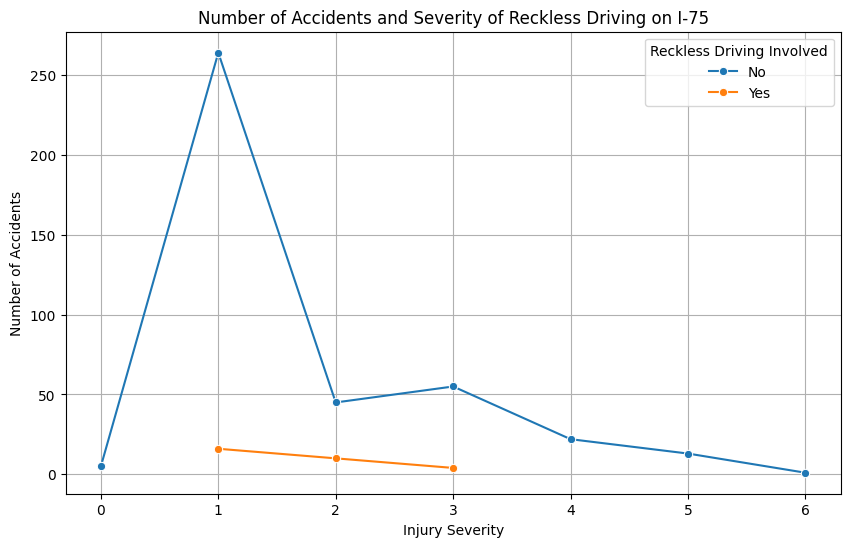

Total number of accidents involving reckless driving on I-75: 30


In [ ]:
# Create a new column indicating whether there was speeding or aggressive driving involved
I75_accidents['Reckless_Driving_Involved'] = (I75_accidents['AGGRESSIVE_DRIVING_IND'] == 'Y') | (I75_accidents['SPEEDING_IND'] == 'Y')
I75_accidents['Reckless_Driving_Involved'] = I75_accidents['Reckless_Driving_Involved'].map({True: 'Yes', False: 'No'})

# Group by injury severity and the new column indicating reckless driving involvement
reckless_driving_I75 = I75_accidents.groupby(['INJSEVER', 'Reckless_Driving_Involved']).size().reset_index(name='COUNT')

# Display the results
print("Number of accidents and severity of reckless driving on I-75:")
print(reckless_driving_I75)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=reckless_driving_I75, x='INJSEVER', y='COUNT', hue='Reckless_Driving_Involved', marker='o')
plt.title('Number of Accidents and Severity of Reckless Driving on I-75')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents')
plt.legend(title='Reckless Driving Involved', loc='upper right')
plt.grid(True)
plt.show()

total_reckless_driving_I75 = reckless_driving_I75[reckless_driving_I75['Reckless_Driving_Involved'] == 'Yes']['COUNT'].sum()

print("Total number of accidents involving reckless driving on I-75:", total_reckless_driving_I75)

Number of accidents and severity of reckless driving on I-95:
    INJSEVER Reckless_Driving_Involved  COUNT
0          0                        No     43
1          1                        No   2457
2          1                       Yes     67
3          2                        No    518
4          2                       Yes     19
5          3                        No    304
6          3                       Yes     10
7          4                        No    169
8          4                       Yes      7
9          5                        No     38
10         6                        No      4


<ipython-input-36-ba6aa5e11221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  I95_accidents['Reckless_Driving_Involved'] = (I95_accidents['AGGRESSIVE_DRIVING_IND'] == 'Y') | (I95_accidents['SPEEDING_IND'] == 'Y')
<ipython-input-36-ba6aa5e11221>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  I95_accidents['Reckless_Driving_Involved'] = I95_accidents['Reckless_Driving_Involved'].map({True: 'Yes', False: 'No'})


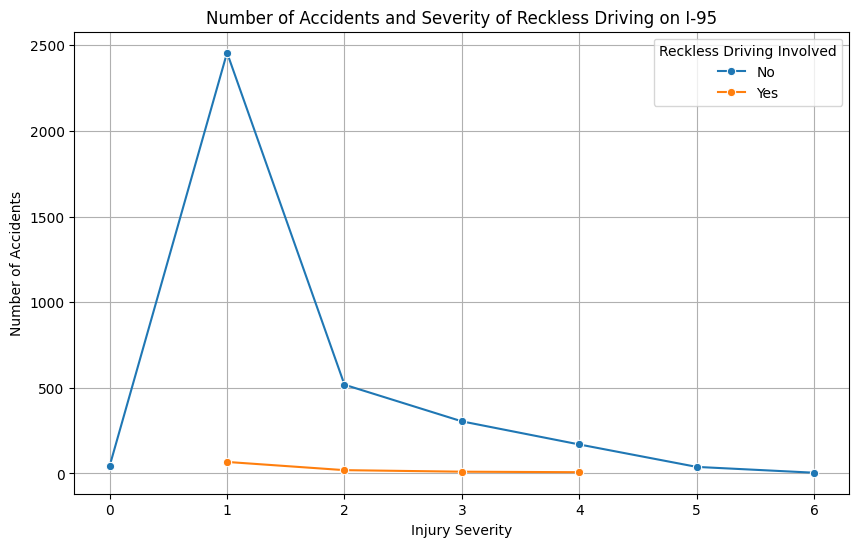

Total number of accidents involving reckless driving on I-95: 103


In [ ]:
# Create a new column indicating whether there was speeding or aggressive driving involved
I95_accidents['Reckless_Driving_Involved'] = (I95_accidents['AGGRESSIVE_DRIVING_IND'] == 'Y') | (I95_accidents['SPEEDING_IND'] == 'Y')
I95_accidents['Reckless_Driving_Involved'] = I95_accidents['Reckless_Driving_Involved'].map({True: 'Yes', False: 'No'})

# Group by injury severity and the new column indicating reckless driving involvement
reckless_driving_I95 = I95_accidents.groupby(['INJSEVER', 'Reckless_Driving_Involved']).size().reset_index(name='COUNT')

# Display the results
print("Number of accidents and severity of reckless driving on I-95:")
print(reckless_driving_I95)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=reckless_driving_I95, x='INJSEVER', y='COUNT', hue='Reckless_Driving_Involved', marker='o')
plt.title('Number of Accidents and Severity of Reckless Driving on I-95')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents')
plt.legend(title='Reckless Driving Involved', loc='upper right')
plt.grid(True)
plt.show()

total_reckless_driving_I95 = reckless_driving_I95[reckless_driving_I95['Reckless_Driving_Involved'] == 'Yes']['COUNT'].sum()

print("Total number of accidents involving reckless driving on I-95:", total_reckless_driving_I95)

### Number of Accidents on I-95 and I-75 by Time of Day and Severity

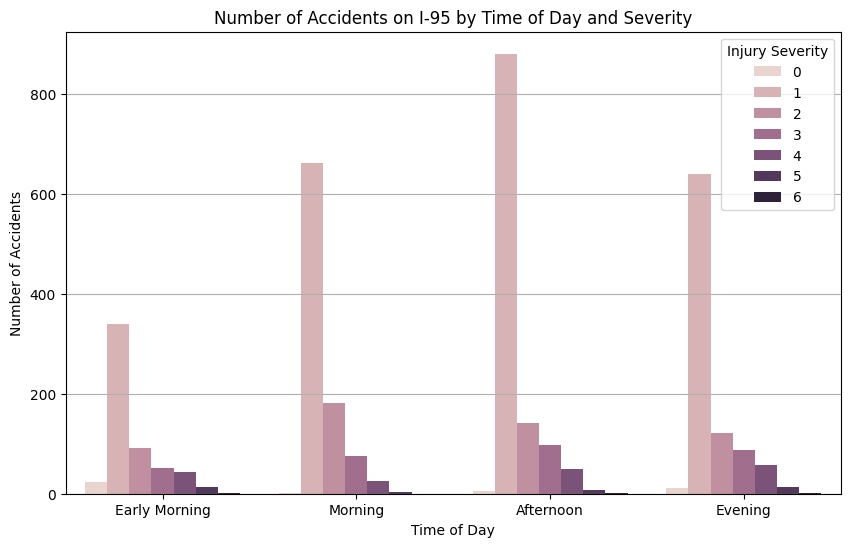

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_counts_I95, x='TIME_GROUP', y='COUNT', hue='INJSEVER')
plt.title('Number of Accidents on I-95 by Time of Day and Severity')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Injury Severity', loc='upper right')
plt.grid(axis='y')
plt.show()

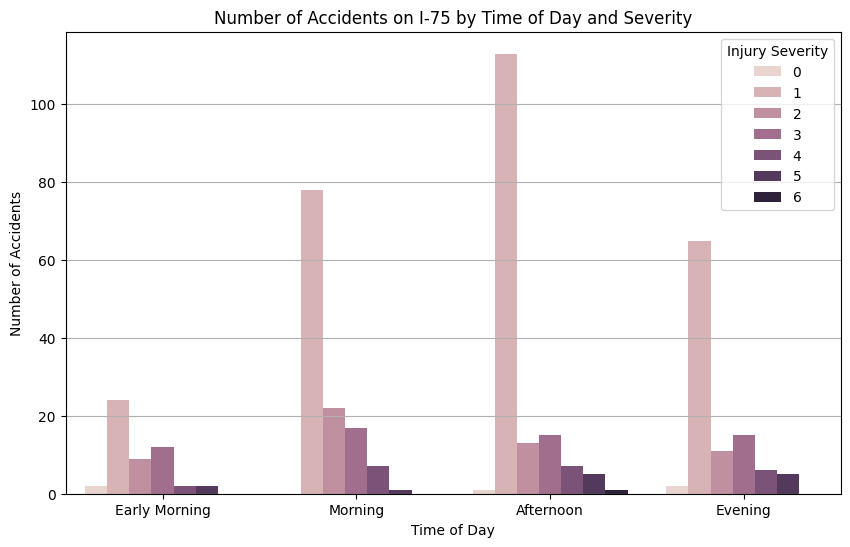

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_counts_I75, x='TIME_GROUP', y='COUNT', hue='INJSEVER')
plt.title('Number of Accidents on I-75 by Time of Day and Severity')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Injury Severity', loc='upper right')
plt.grid(axis='y')
plt.show()

### Weather Conditions and Accident Severity on I-75 and I-95

<Figure size 1000x600 with 0 Axes>

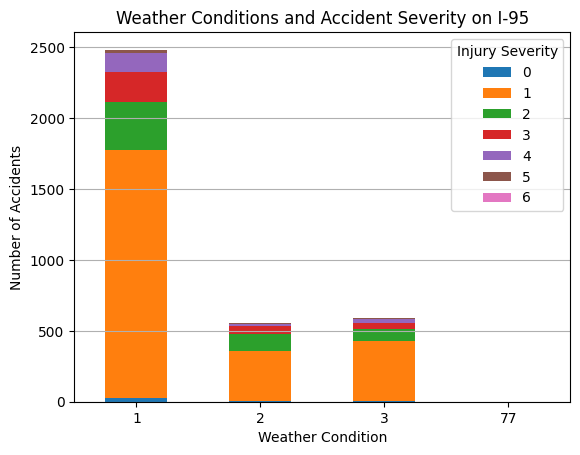

In [ ]:
# Create a pivot table for the data
pivot_table = weather_severity_counts_I95.pivot_table(index='EVNT_WTHR_COND_CD', columns='INJSEVER', values='COUNT', fill_value=0)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Weather Conditions and Accident Severity on I-95')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Injury Severity')
plt.grid(axis='y')
plt.show()
# 1 means clear weather, 2 is cloudy, 3 is rainy, 4 is fog, and 77 is all other

<Figure size 1000x600 with 0 Axes>

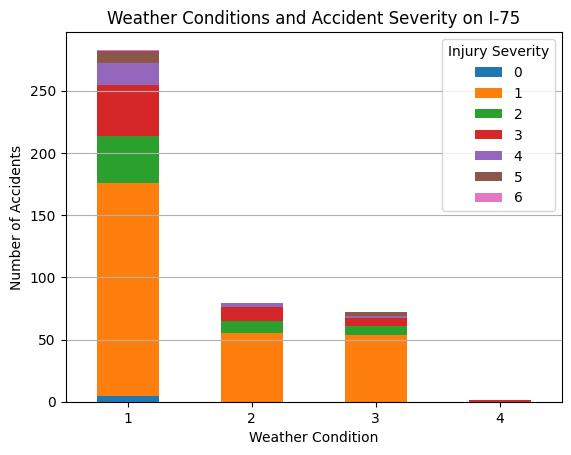

In [ ]:
# Group by weather condition and accident severity, then count the number of accidents
weather_severity_counts_I75 = I75_accidents.groupby(['EVNT_WTHR_COND_CD', 'INJSEVER']).size().reset_index(name='COUNT')

# Pivot the table to prepare for plotting
pivot_table = weather_severity_counts_I75.pivot_table(index='EVNT_WTHR_COND_CD', columns='INJSEVER', values='COUNT', fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Weather Conditions and Accident Severity on I-75')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.legend(title='Injury Severity')
plt.grid(axis='y')
plt.show()

# 1 means clear weather, 2 is cloudy, 3 is rainy, 4 is fog, and 77 is all other

### Number of Accidents at Each Injury Severity Level on I-75 and I-95

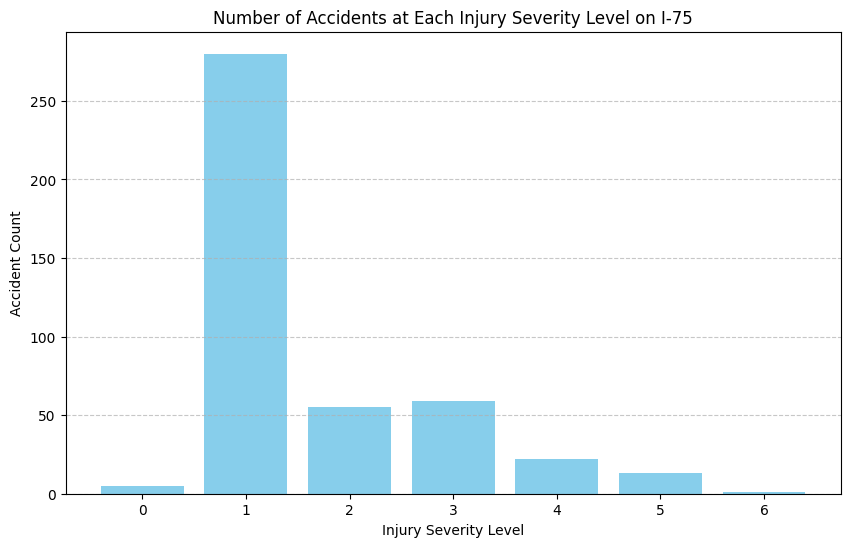

In [ ]:
# Plotting injury severity of all accidents on I-75
plt.figure(figsize=(10, 6))
plt.bar(I75_injsever_count['INJSEVER'], I75_injsever_count['COUNT'], color='skyblue')
plt.title('Number of Accidents at Each Injury Severity Level on I-75')
plt.xlabel('Injury Severity Level')
plt.ylabel('Accident Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


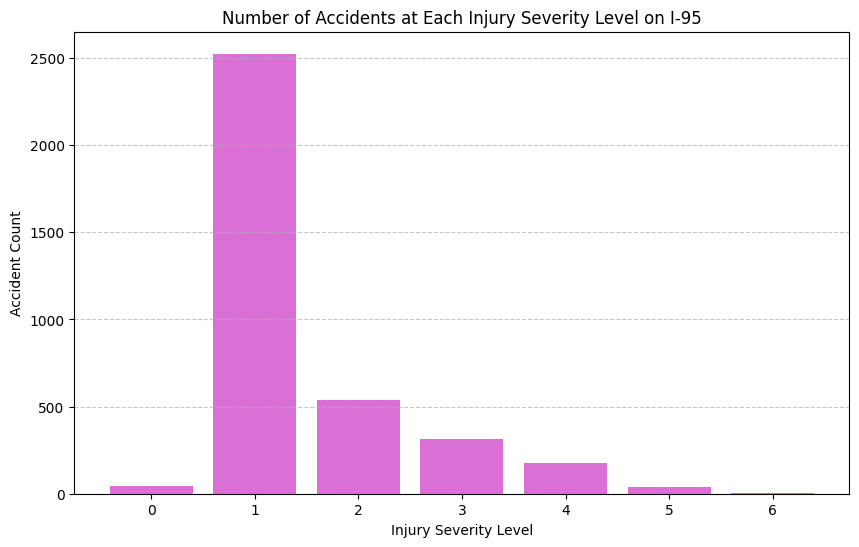

In [ ]:
# Plotting injury severity of all accidents on I-95
plt.figure(figsize=(10, 6))
plt.bar(I95_injsever_count['INJSEVER'], I95_injsever_count['COUNT'], color='Orchid')
plt.title('Number of Accidents at Each Injury Severity Level on I-95')
plt.xlabel('Injury Severity Level')
plt.ylabel('Accident Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Total Number of Fatalities on I-75 vs I-95

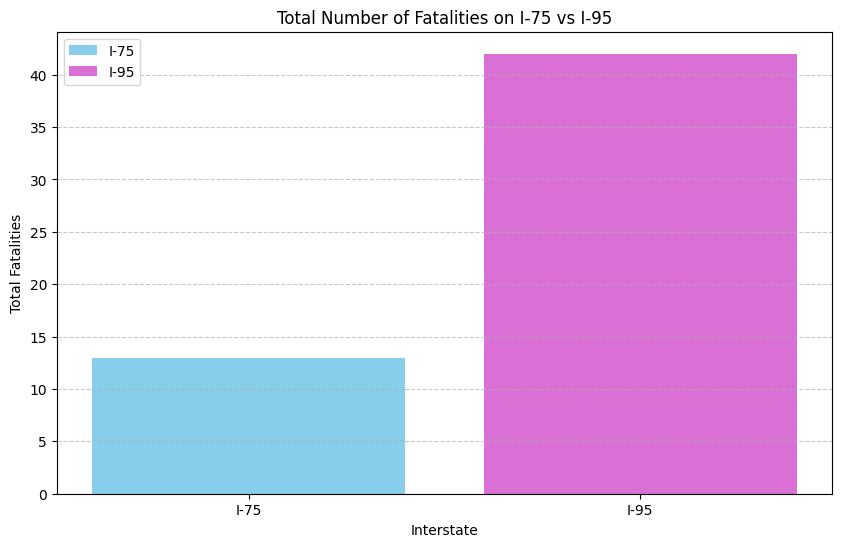

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))

# Plotting total fatalities on I-75
plt.bar('I-75', total_fatalities_I75, color='skyblue', label='I-75')

# Plotting total fatalities on I-95
plt.bar('I-95', total_fatalities_I95, color='Orchid', label='I-95')

plt.title('Total Number of Fatalities on I-75 vs I-95')
plt.xlabel('Interstate')
plt.ylabel('Total Fatalities')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
